In [12]:
#!pip3 install PyPDF2

In [17]:
#pip install 'PyPDF2<3.0'

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.8/222.8 kB 2.6 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: PyPDF2
    Found existing installation: PyPDF2 3.0.1
    Uninstalling PyPDF2-3.0.1:
      Successfully uninstalled PyPDF2-3.0.1
Note: you may need to restart the kernel to use updated packages.


In [1]:
#!pip install camelot-py

In [6]:
#conda install -c conda-forge opencv

Retrieving notices: ...working... done
Solving environment: | 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/osx-64::holoviews==1.15.0=py39hecd8cb5_0
  - defaults/noarch::tifffile==2021.7.2=pyhd3eb1b0_2
  - defaults/osx-64::imageio==2.19.3=py39hecd8cb5_0
  - defaults/osx-64::scikit-learn==1.0.2=py39hae1ba45_1
  - defaults/osx-64::bottleneck==1.3.5=py39h67323c0_0
  - defaults/osx-64::scikit-image==0.19.2=py39hae1ba45_0
  - defaults/osx-64::datashape==0.5.4=py39hecd8cb5_1
  - conda-forge/osx-64::wordcloud==1.8.2.2=py39ha30fb19_1
  - defaults/osx-64::mkl_random==1.2.2=py39hb2f4e1b_0
  - defaults/osx-64::numexpr==2.8.3=py39h2e5f0a9_0
  - defaults/osx-64::imagecodecs==2021.8.26=py39h0f85e6e_1
  - defaults/osx-64::h5py==3.7.0=py39h4a1dd59_0
  - defaults/osx-64::pywavelets==1.3.0=py39hca72f7f_0
  - defaults/osx-64::scikit-learn-intelex==2021.6.0=py39hecd8cb5_0
  - defaults/osx-64::numpy==1.21.5=py39

In [3]:
import PyPDF2
import re
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
import re
import spacy
import nltk
nltk.download('all')
nltk.download('stopwords')  
nltk.download('wordnet')

from matplotlib import colors as mcolors

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     /Users/nastiasaprykina/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     /Users/nastiasaprykina/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /Users/nastiasaprykina/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /Users/nastiasaprykina/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /Users/nastiasaprykina/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-

In [40]:
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
import gensim
from gensim import corpora
from nltk.sentiment.vader import SentimentIntensityAnalyzer as sentiment_analyzer

# 1. Data readers

### EURAM

* 2021

In [9]:
# Read the PDF file
pdf_reader = PyPDF2.PdfFileReader('EURAM-2021-Book.pdf')

# Initialize variables
EURAM_2021 = []
found_presentation = False

# Loop through each page of the PDF file
for page in range(pdf_reader.getNumPages()):
    # Extract the text from the page
    page_text = pdf_reader.getPage(page).extractText()

    # Loop through each line of the page text
    for line in page_text.split('\n'):
        # Check if the line starts with a 4-digit number
        if line.strip().startswith(tuple(str(i) for i in range(1000, 10000))):
            found_presentation = True
            EURAM_2021.append(line.strip()[5:])
    # Reset the "found_presentation" flag for the next page
    found_presentation = False

In [10]:
EURAM_2021

['EXTENDING ORGANIZATIONAL PATH DEPENDENCY THEORY BY A FAMILY BUSINESS PERSPECTIVE',
 'DOES PAIN DELIVER PROGRESS? HOW FAMILY FIRMS DEVELOP DIGITAL INNOVATION AND ADAPTIVE CAPACITY',
 'INNOVATION THROUGH TRADITION: EMPIRICAL EVIDENCE ON THE ROLE OF SUCCESSORS IN THE ITALIAN',
 'RESOURCE-BASED VIEW AND SUSTAINABILITY OF SMES',
 'TECHNIQUES AND COLORS OF PROFESSIONALIZATION AND MANAGERIALIZATION IN FAMILY FIRMS',
 'DIFFERENT HRM SYSTEMS IN FAMILY SMES',
 'FROM AGILE SOFTWARE DEVELOPMENT TO AGILE COMPLEX INDUSTRIAL PRODUCTS DEVELOPMENT? A',
 'AGILE PROJECT MANAGEMENT AND TEAMWORK QUALITY: THE MODERATING ROLE OF ORGANIZATIONAL',
 'A ROADMAP FOR TRANSITIONING FROM TRADITIONAL TO AGILE PROJECT MANAGEMENT',
 'THE INFLUENCE OF COUNTRY´S INSTITUTIONS (FORMAL AND INFORMAL) ON JOB SATISFACTION. A MULTILEVEL',
 'A PATTERN-ORIENTED APPROACH TO STUDY AGGRESSION: IMPLICATIONS FOR EMOTIONAL WELL-BEING',
 'COMMITMENT AS TWO-EDGED SWORD: HOW ORGANIZATIONAL COMMITMENT SHAPES THE RELATIONSHIPS',
 'WHY WE 

* 2022

In [11]:
pdf_reader = PyPDF2.PdfFileReader('EURAM-2022.pdf')

# Initialize variables
EURAM_2022 = []
found_presentation = False

# Loop through each page of the PDF file
for page in range(25, pdf_reader.getNumPages()):
    # Extract the text from the page
    page_text = pdf_reader.getPage(page).extractText()

    # Loop through each line of the page text
    for line in page_text.split('\n'):
        # Check if the line starts with a 4-digit number
        if line.strip().startswith(tuple(str(i) for i in range(1000, 10000))):
            found_presentation = True
            EURAM_2022.append(line.strip()[5:])
    # Reset the "found_presentation" flag for the next page
    found_presentation = False

Xref table not zero-indexed. ID numbers for objects will be corrected.


In [12]:
EURAM_2022

['BALANCING HIERARCHY AND NETWORK: GOVERNANCE OF INTER-ORGANIZATIONAL NETWORKS FOR',
 'EXPLORING PROJECT STEERING COMMITTEES',
 'THE GRAMMARS OF OBJECTIVES AND KEY RESULTS',
 'ORGANISATIONAL DESIGN IN MEGAPROJECTS: A SYSTEMATIC LITERATURE REVIEW AND RESEARCH',
 'MEGAPROJECT MANAGEMENT FOR PORT TERRITORIAL PLANNING AND DEVELOPMENT',
 'KNOWLEDGE STORAGE AND ACCESSIBILITY IN INTERORGANIZATIONAL PROJECT',
 'TOWARDS A CONCEPTUAL FRAMEWORK FOR UNFOLDING STAKEHOLDER’S PERCEPTIONS',
 'STAKEHOLDER ENGAGEMENT IN PROJECT ECOLOGIES: PRACTICES AND RATIONALES',
 'GOVERNMENTAL STAKEHOLDER ENGAGEMENT IN INDUSTRIAL ENGINEERING PROJECTS',
 'PARADOXICAL TENSIONS OF BUSINESS MODEL INNOVATION FOR A CIRCULAR ECONOMY',
 'ANTECEDENTS AND OUTCOMES OF GREEN MANUFACTURING - A SYSTEMATIC LITERATURE REVIEW',
 'ROAD TO SUSTAINABILITY: ORGANISATIONAL ANTECEDENTS OF KNOWLEDGE CREATING,',
 'HAS RESEARCH ON WOMEN AND CORPORATE BOARDS DELIVERED ON ITS PROMISE? AN AGENDA FOR',
 'QUOTAS FOR WOMEN ON BOARD AND CORPORATE VE

### DRUID

* 2022

In [29]:
pdf_reader = PyPDF2.PdfFileReader('DRUID PROGRAMME 2022.pdf')
import calendar

weekday_names = list(calendar.day_name)

# Initialize variables
DRUID_2022 = []
found_quote = False


# Loop through each page of the PDF file
for page in range(22, pdf_reader.getNumPages()):
    # Extract the text from the page
    page_text = pdf_reader.getPage(page).extractText()

    # Loop through each line of the page text
    for line in page_text.split('\n'):
        extracted_text = ""
        # Check if the line contains an opening quote
        if '”' in line and not found_quote:
            found_quote = True
            extracted_text += line.split('”')[1]
        # Check if the line contains a closing quote
        elif '”' in line and found_quote:
            found_quote = False
            extracted_text += line.split('”')[0]
        # If the opening quote has been found, extract the text
        elif found_quote:
            extracted_text += line
        DRUID_2022.append(extracted_text)

        
DRUID_2022 = list(filter(lambda x: x != '' and x != ' ' and not x.startswith('Discussants:') and not any(x.startswith(day) for day in weekday_names), DRUID_2022))

DRUID_2022

['To Exit or to Remain in Informality? A Study of Infor -',
 'mal Entrepreneurs’ Exit Intention in Three African Countries',
 'Conditional Ef fect of Nature of Business Activity on the Relationship between Perceived Barriers and Entre -',
 'preneurial Exit Intentions',
 'Too Hot to Handle: The Ef fects of Misconduct on Entrepreneurial Venture Outcomes',
 '7 ECO-INNOVATION: CONCEPTS AND FRAMEWORKS',
 'CARLOS F. ARROYABE: ',
 'DELIA MANGELKRAMER:  ',
 'EMRAH KARAKAYA: ',
 'Institu -',
 'tional Conditions and Export-oriented Entrepreneurial Activity: A Cross-country Analysis',
 'Regional Strategies of MNEs: An Empirical Assessment for FDI Activities of French and Ger -',
 'man Firms',
 'Knowledge-based Capital for Industrial Upgrading in Global Value Chains: The Case of the European Food Sectors',
 '9 POLICY: MISSION-DRIVEN PROGRAMS',
 'DANIEL GROSS, BHAVEN SAMPAT:  ',
 'Selective Attention in Mission-driv -',
 'en Innovation: A Study of Five Mission Driven Environments in Sweden',
 'Mana

In [25]:
EURAM = pd.DataFrame({"names": EURAM_2021 + EURAM_2022})
EURAM['names']

0       EXTENDING ORGANIZATIONAL PATH DEPENDENCY THEOR...
1       DOES PAIN DELIVER PROGRESS? HOW FAMILY FIRMS D...
2       INNOVATION THROUGH TRADITION: EMPIRICAL EVIDEN...
3          RESOURCE-BASED VIEW AND SUSTAINABILITY OF SMES
4       TECHNIQUES AND COLORS OF PROFESSIONALIZATION A...
                              ...                        
1660       TRADING ACTIVITY IN PUBLIC REAL ESTATE MARKETS
1661    GOODWILL IMPAIRMENT, EARNINGS MANAGEMENT AND T...
1662    SHOULD WE JUDGE A BOOK BY ITS COVER? HOW TOP M...
1663    DOES TOP MANAGEMENT TEAM DIVERSITY AFFECT ACCO...
1664    TALKING ABOUT A REVOLUTION - MANAGEMENT SHAKE-...
Name: names, Length: 1665, dtype: object

# 2. Necessary functions

* text lemmatization, stop words removal, etc.

In [31]:
nlp = spacy.blank('en')
stop = set(stopwords.words('english'))
exclude = set(string.punctuation) 
lemma = WordNetLemmatizer()
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized
remove_spaces = lambda x : re.sub('\\s+', ' ', x)
remove_double_quotes = lambda x : x.replace('"', '')
remove_single_quotes = lambda x : x.replace('\'', '')
trim = lambda x : x.strip()

other_chars = ['*', '–', '•', '#', '&x200B', '[', ']', '; ',' ;' "&nbsp", "“","“","”", "x200b"]
def remove_other_chars(x: str):
    for char in other_chars:
        x = x.replace(char, '')
    
    return x

def lower_case_text(text):
    return text.lower()
funcs = [
    lower_case_text,
    remove_other_chars,
    clean,
    remove_spaces,
    trim,
    remove_double_quotes, 
    remove_single_quotes,
    ]

* frequancy plot + excel generator

In [52]:
from collections import Counter
import seaborn as sns
import textacy

nlp = spacy.load("en_core_web_sm")

def frequency_plot(data, word_num, data_name):
    text = " ".join(data)
    # Detect common phrases in the text and replace them with a single unit
    text_phrases = textacy.extract.ngrams(textacy.make_spacy_doc(text, lang=nlp), 2, filter_stops=True, filter_punct=True, min_freq=2)
    text_phrases = list(textacy.extract.entities(textacy.make_spacy_doc(text, lang=nlp))) + list(text_phrases)
    for phrase in text_phrases:
        text = text.replace(" ".join([str(token) for token in phrase]), "_".join([str(token) for token in phrase]))
    words = text.split()
    word_freq = Counter(words)
    freq_data = pd.DataFrame.from_dict(word_freq, orient='index')
    freq_data.to_excel('frequencies_{0}.xlsx'.format(data_name)) 
    print("15 most common words: ", word_freq.most_common(word_num))
    print("Total number of unique words: ", len(word_freq))
    top_words = dict(word_freq.most_common(word_num)[::-1])
    # plot a horizontal bar chart of the word frequencies
    plt.barh(range(len(top_words)), list(top_words.values()), align='center')
    plt.yticks(range(len(top_words)), list(top_words.keys()))
    # set the axis labels and title
    plt.xlabel("Frequency")
    plt.ylabel("Words")
    plt.title("Top {0} Word Frequencies".format(word_num))
    # show the plot
    plt.show()

* Word Cloud

In [47]:
from wordcloud import WordCloud
def word_cloud(data):
    data_clean = [clean(doc).split() for doc in data]
    long_string = ",".join([" ".join(sentence) for sentence in data_clean])
    wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
    wordcloud.generate(long_string)
    return wordcloud.to_image()

* Perplexity plot (to derive the optimal number of clusters)

In [48]:
def perplexity_plot(data):
    data_clean = [clean(doc).split() for doc in data] 
    dictionary = corpora.Dictionary(data_clean)
    dictionary.doc2bow(data_clean[0])
    data_term_matrix = [dictionary.doc2bow(doc) for doc in data_clean]
    [[(dictionary[id], freq) for id, freq in cp] for cp in data_term_matrix[0:]]
    perplexity_values = []
    Lda = gensim.models.ldamodel.LdaModel
    for num_topics in range(2, 10, 1):
        lda_model = Lda(data_term_matrix, num_topics=num_topics, id2word = dictionary, passes=10)
        perplexity_lda = lda_model.log_perplexity(data_term_matrix)
        perplexity_values.append(perplexity_lda)
    limit=40; start=2; step=4;
    x = range(2, 10, 1)
    plt.plot(x, perplexity_values)
    plt.xlabel("Num Topics")
    plt.ylabel("Perplexity score")
    plt.legend(("perplexity_values"), loc='best')
    plt.show() 

* Word Clouds for each topic

In [49]:
def visualise_topics(data, num_topics, num_words): # num_topics to be obtained from the perplexity graph
    data_clean = [clean(doc).split() for doc in data] 
    dictionary = corpora.Dictionary(data_clean)
    dictionary.doc2bow(data_clean[0])
    data_term_matrix = [dictionary.doc2bow(doc) for doc in data_clean]
    [[(dictionary[id], freq) for id, freq in cp] for cp in data_term_matrix[0:]]
    perplexity_values = []
    Lda = gensim.models.ldamodel.LdaModel
    
    lda_model = Lda(data_term_matrix, num_topics=num_topics, id2word = dictionary, passes=10)
    print(lda_model.print_topics(num_topics=num_topics, num_words=num_words))
    
    
    for (topic, words) in lda_model.print_topics():
        print(topic+1, ":", words, '\n\n')
        
        
    cloud = WordCloud(stopwords=stop,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=num_words,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)
    cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
    topics = lda_model.show_topics(formatted=False, num_topics=num_topics)
    fig, axes = plt.subplots(2, int(num_topics/2), figsize=(10,10), sharex=True, sharey=True)
    for i, ax in enumerate(axes.flatten()):
        fig.add_subplot(ax)
        topic_words = dict(topics[i][1])
        cloud.generate_from_frequencies(topic_words, max_font_size=300)
        plt.gca().imshow(cloud)
        plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
        plt.gca().axis('off')
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.axis('off')
    plt.margins(x=0, y=0)
    plt.tight_layout()
    plt.show()

* Preliminary step for table

In [59]:
def format_topics_sentences(ldamodel, corpus, data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(data)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

* Frequency + weights plot for each cluster (exports data to excel automatically)

In [57]:
def clusters_plot(data, data_name):
    data_clean = [clean(doc).split() for doc in data] 
    dictionary = corpora.Dictionary(data_clean)
    data_term_matrix = [dictionary.doc2bow(doc) for doc in data_clean]
    [[(dictionary[id], freq) for id, freq in cp] for cp in data_term_matrix[0:]]
    Lda = gensim.models.ldamodel.LdaModel
    lda_model_names = Lda(data_term_matrix, num_topics=6, id2word = dictionary, passes=10)
    
    topics = lda_model_names.show_topics(formatted=False)
    data_flat = [w for w_list in data_clean for w in w_list]
    counter = Counter(data_flat)
    out = []
    for i, topic in topics:
        for word, weight in topic:
            out.append([word, i , weight, counter[word]])
    df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])
    # Plot Word Count and Weights of Topic Keywords
    fig, axes = plt.subplots(3, 2, figsize=(15,18), sharey=True, dpi=160)
    cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
    for i, ax in enumerate(axes.flatten()):
        ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
        ax_twin = ax.twinx()
        ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
        ax.set_ylabel('Word Count', color=cols[i])
        ax_twin.set_ylim(0, 0.05); ax.set_ylim(0, 200)
        ax.set_title('Topic: ' + str(i+1), color=cols[i], fontsize=16)
        ax.tick_params(axis='y', left=False)
        ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
        ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')
    fig.tight_layout(w_pad=2)
    fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=10, y=1.05)    
    plt.show()
    df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model_names, corpus=data_term_matrix, data=data)

    # Format
    df_dominant_topic = df_topic_sents_keywords.reset_index()
    df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
    df_dominant_topic.to_excel("dominant_topics_{0}.xlsx".format(data_name))

# 3. Applying the functions !

In [32]:
for fun in funcs:
    EURAM['names'] = EURAM['names'].apply(fun)   
    
EURAM_list = EURAM.names.tolist()

In [33]:
EURAM_list

['extending organizational path dependency theory family business perspective',
 'pain deliver progress family firm develop digital innovation adaptive capacity',
 'innovation tradition empirical evidence role successor italian',
 'resourcebased view sustainability smes',
 'technique color professionalization managerialization family firm',
 'different hrm system family smes',
 'agile software development agile complex industrial product development',
 'agile project management teamwork quality moderating role organizational',
 'roadmap transitioning traditional agile project management',
 'influence country´s institution formal informal job satisfaction multilevel',
 'patternoriented approach study aggression implication emotional wellbeing',
 'commitment twoedged sword organizational commitment shape relationship',
 'study culture only way do another history interpretive positivist',
 'culture entrepreneurship research paradigm promising perspective',
 'critical view competing approa

15 most common words:  [('role', 63), ('impact', 51), ('perspective', 47), ('management', 45), ('effect', 42), ('performance', 39), ('strategy', 38), ('project', 37), ('digital', 36), ('analysis', 36), ('practice', 35), ('evidence', 35), ('research', 34), ('exploring', 33), ('relationship', 32)]
Total number of unique words:  3890


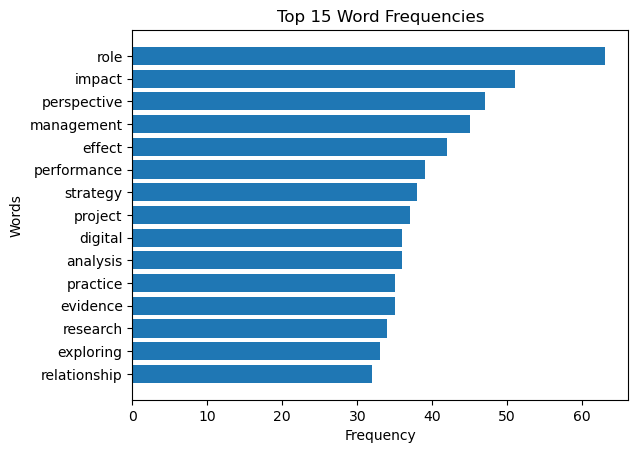

In [46]:
frequency_plot(EURAM_list, 15, "EURAM")

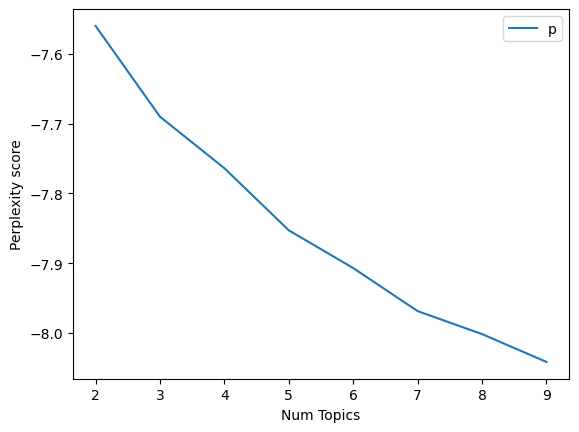

In [53]:
perplexity_plot(EURAM_list)

[(0, '0.019*"role" + 0.015*"management" + 0.014*"strategic" + 0.011*"social" + 0.010*"digital" + 0.008*"project" + 0.007*"entrepreneur" + 0.007*"research" + 0.007*"governance" + 0.006*"literature"'), (1, '0.016*"effect" + 0.012*"innovation" + 0.011*"learning" + 0.011*"role" + 0.011*"performance" + 0.010*"firm" + 0.010*"social" + 0.008*"work" + 0.007*"psychological" + 0.006*"analysis"'), (2, '0.016*"role" + 0.011*"organizational" + 0.009*"value" + 0.008*"perspective" + 0.007*"innovation" + 0.007*"entrepreneurial" + 0.007*"study" + 0.007*"social" + 0.007*"cultural" + 0.006*"leadership"'), (3, '0.026*"business" + 0.019*"model" + 0.017*"impact" + 0.016*"innovation" + 0.013*"project" + 0.010*"management" + 0.008*"social" + 0.007*"entrepreneurial" + 0.007*"development" + 0.006*"digital"'), (4, '0.012*"study" + 0.012*"innovation" + 0.012*"research" + 0.010*"sustainable" + 0.008*"management" + 0.008*"review" + 0.007*"leadership" + 0.007*"entrepreneurship" + 0.007*"project" + 0.006*"evidence"')

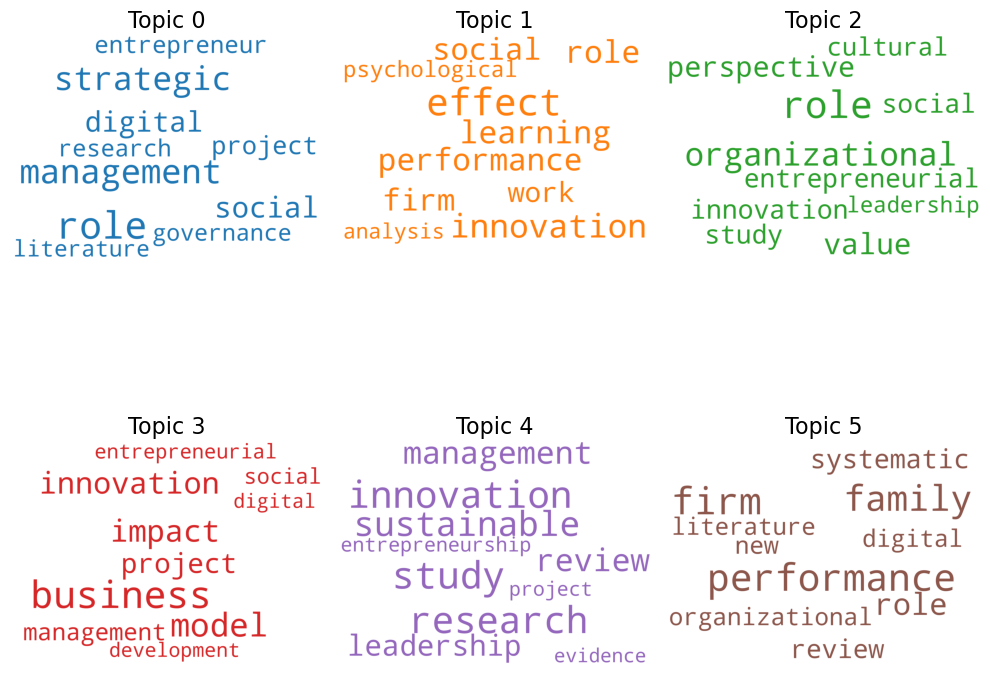

In [54]:
visualise_topics(EURAM_list, 6, 10)

/var/folders/7_/p4v5xn6n4l3_c0mvx2dh2d300000gn/T/ipykernel_34050/4186421432.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
/var/folders/7_/p4v5xn6n4l3_c0mvx2dh2d300000gn/T/ipykernel_34050/4186421432.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
/var/folders/7_/p4v5xn6n4l3_c0mvx2dh2d300000gn/T/ipykernel_34050/4186421432.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
/var/folders/7_/p4v5xn6n4l3_c0mvx2dh2d300000gn/T/ipykernel_34050/4186421432.py:28: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalig

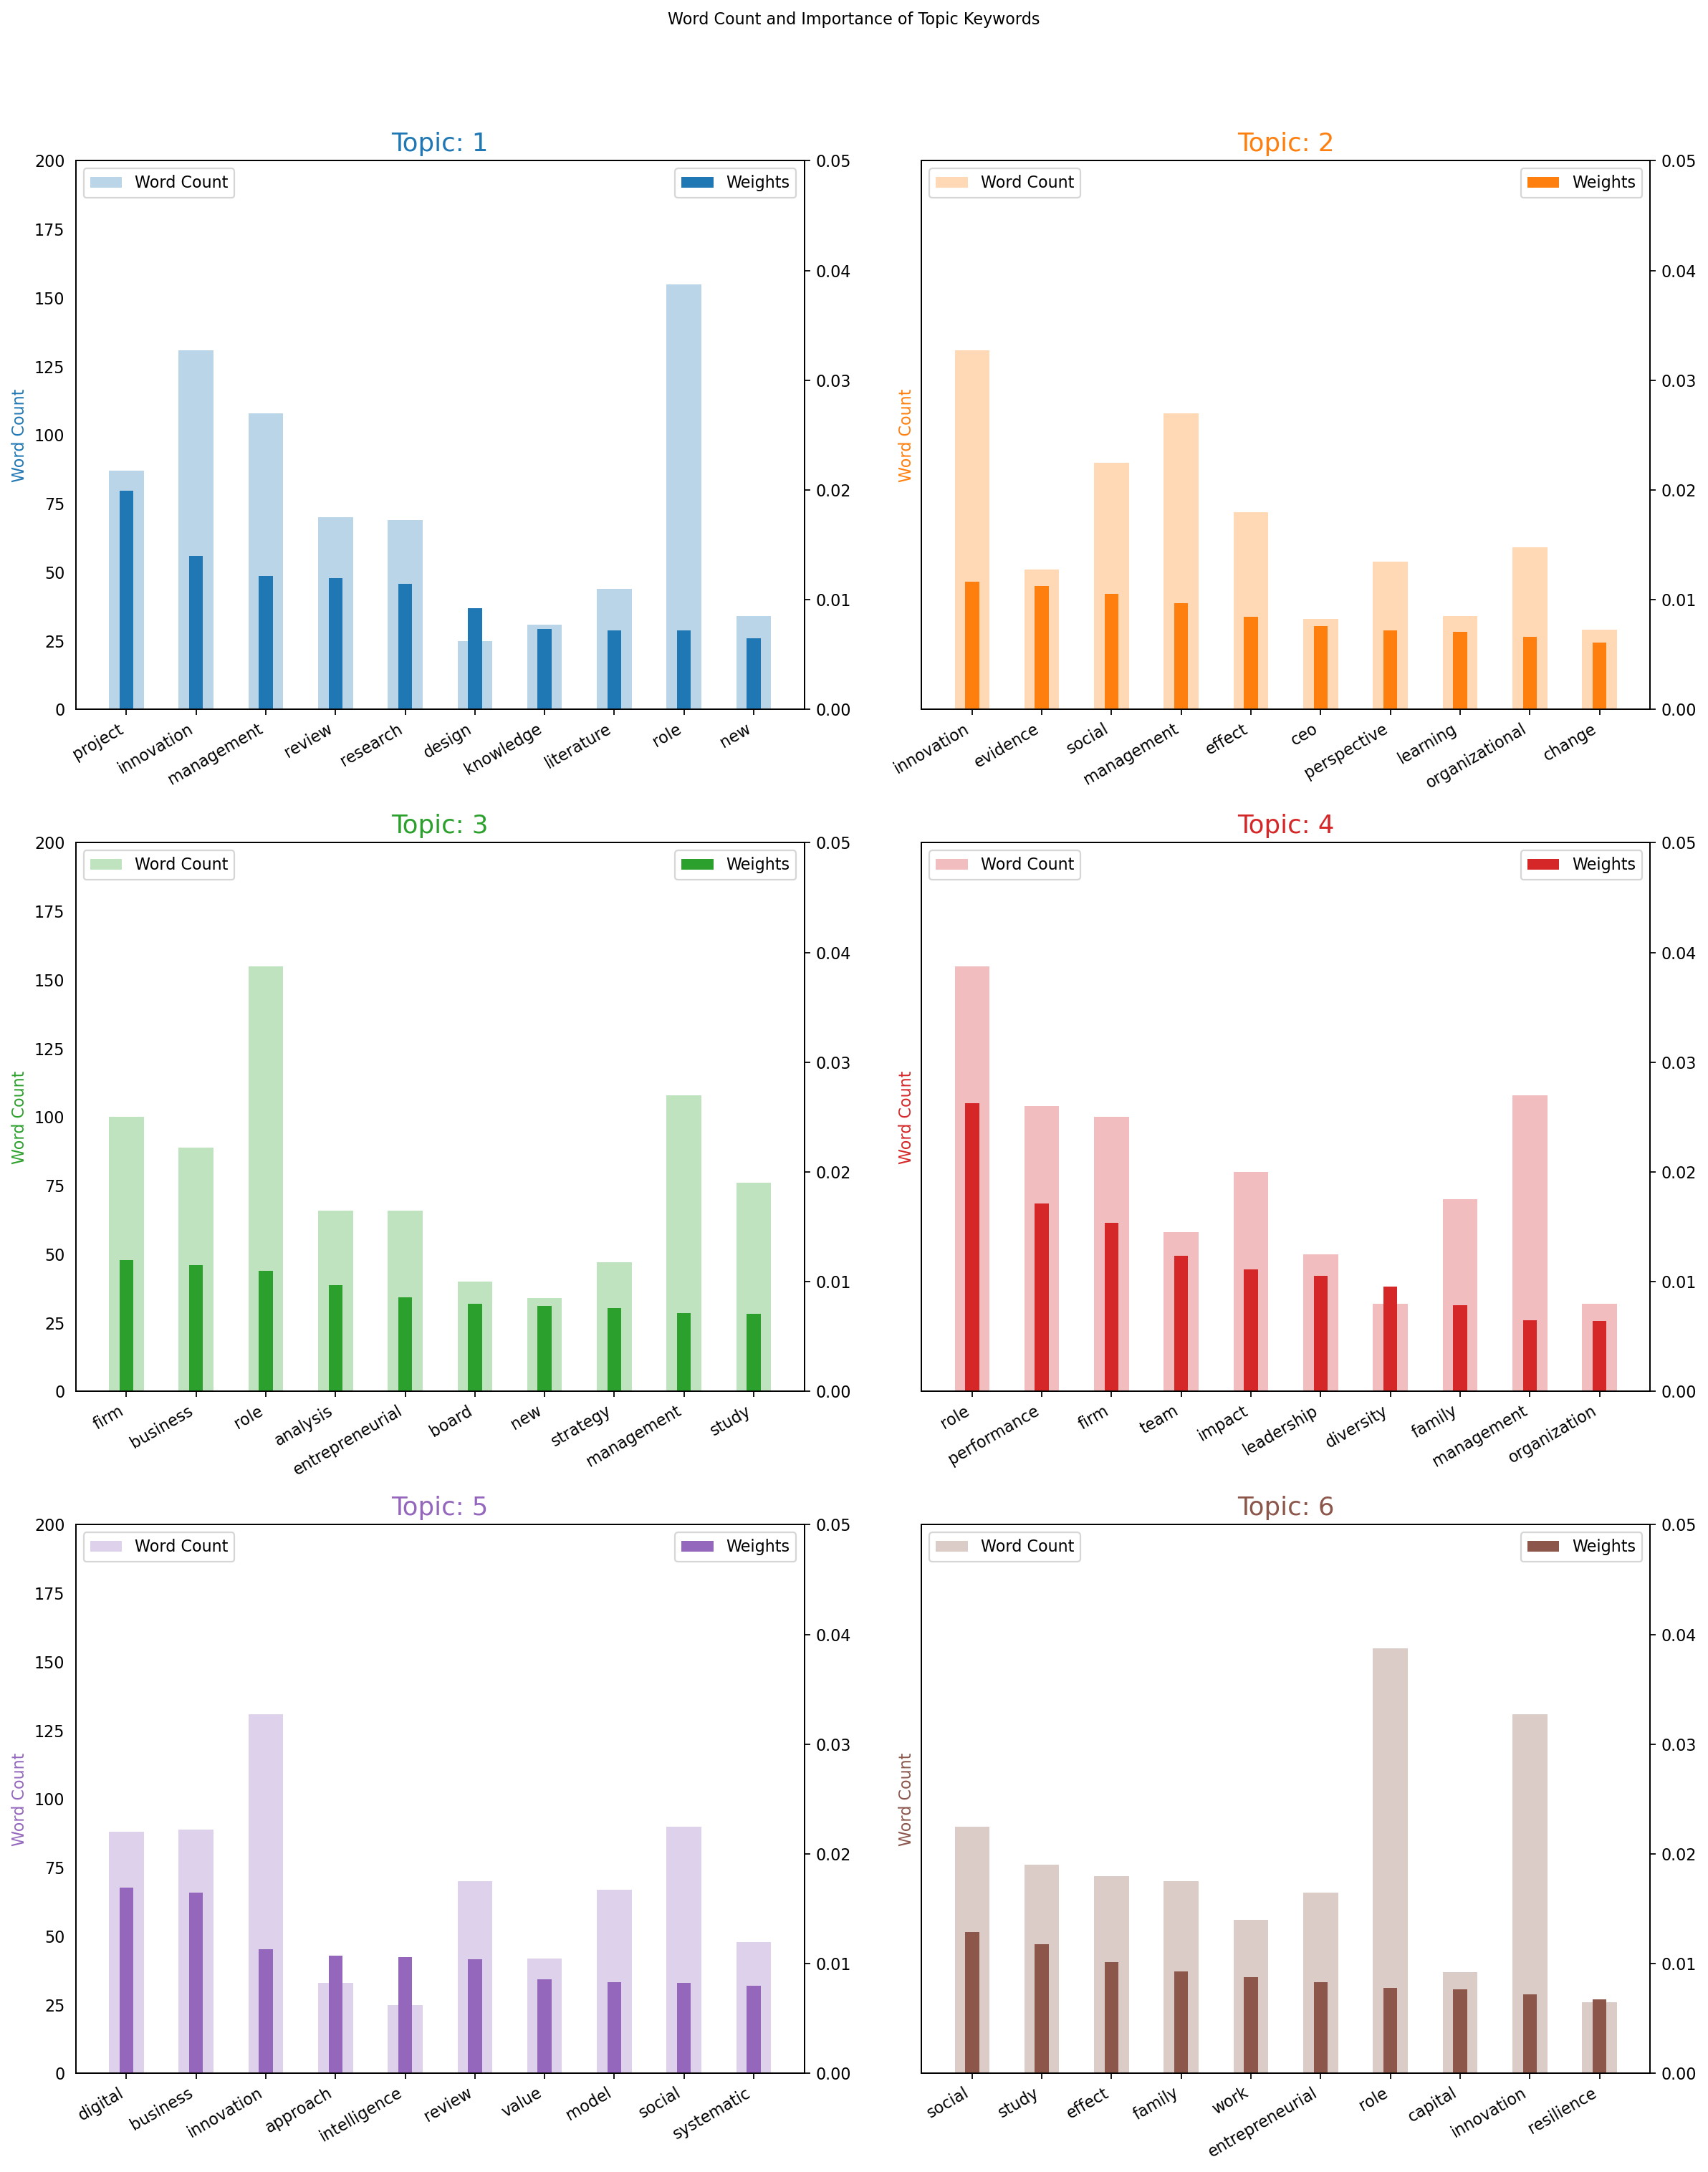

/var/folders/7_/p4v5xn6n4l3_c0mvx2dh2d300000gn/T/ipykernel_34050/1174859406.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
/var/folders/7_/p4v5xn6n4l3_c0mvx2dh2d300000gn/T/ipykernel_34050/1174859406.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)


In [60]:
clusters_plot(EURAM_list, 'EURAM')